In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from collections import Counter
from collections import defaultdict
from sklearn.preprocessing import StandardScaler

In [4]:
#!pip install scikit-plot
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import roc_curve, auc, roc_auc_score
import scikitplot as skplt
from scikitplot.metrics import plot_roc
from scikitplot.metrics import plot_precision_recall
from scikitplot.metrics import plot_cumulative_gain
from scikitplot.metrics import plot_lift_curve
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from numpy import mean
from numpy import std
from scipy.special import expit
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import plot_roc
from matplotlib import pyplot
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline

In [5]:
df=pd.read_csv('df_RFE_6Class_LOF.csv')
df=df.drop(columns=['Unnamed: 0'])
df=df[(df['label']==4) | (df['label']==2)]
df['label']=df['label'].map({4:0,2:1})

In [ ]:
#sns.pairplot(df)

In [6]:
X = df.values
X_features=X[:,:28]
y = np.array(df['label'])

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2274 entries, 26 to 7036
Data columns (total 30 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   tBodyAcc-entropy()-X             2274 non-null   float64
 1   tBodyAcc-correlation()-X,Y       2274 non-null   float64
 2   tBodyAcc-correlation()-Y,Z       2274 non-null   float64
 3   tGravityAcc-mean()-Y             2274 non-null   float64
 4   tGravityAcc-max()-X              2274 non-null   float64
 5   tGravityAcc-max()-Z              2274 non-null   float64
 6   tGravityAcc-min()-X              2274 non-null   float64
 7   tGravityAcc-min()-Y              2274 non-null   float64
 8   tGravityAcc-energy()-Y           2274 non-null   float64
 9   tGravityAcc-arCoeff()-Y,1        2274 non-null   float64
 10  tGravityAcc-arCoeff()-Y,3        2274 non-null   float64
 11  tGravityAcc-arCoeff()-Z,2        2274 non-null   float64
 12  tGravityAcc-arCoeff

In [8]:
test = pd.read_csv('df_RFE_test.csv')
test=test.drop(columns=['Unnamed: 0'])
test=test[(test['label']==4) | (test['label']==2)]
test['label']=test['label'].map({4:0,2:1})

In [9]:
Xtest= test.values
X_test=Xtest[:,:28]
ytest = np.array(test['label'])

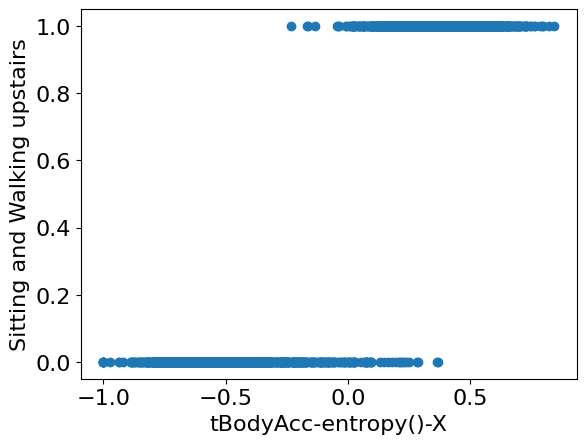

In [10]:
plt.scatter(X_features.T[0], y)
plt.xlabel(('tBodyAcc-entropy()-X'), fontsize=16)
plt.ylabel('Sitting and Walking upstairs', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

# Binary classification (considering only one variable)

In [12]:
logist = LogisticRegression(random_state=0)
logist.fit(X_features.T[0].reshape(-1,1), y)

LogisticRegression(random_state=0)

In [13]:
# define the model evaluation procedure (cross validation)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate the model and collect the scores
n_scores = cross_val_score(logist, X_features, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report the model performance
print('Mean Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Mean Accuracy: 1.000 (0.000)


In [14]:
print(logist.coef_)
print(logist.intercept_)

[[10.25606541]]
[0.10831176]


In [15]:
y_pred2 = logist.predict(X_test.T[0].reshape(-1,1))

print('Accuracy %s' % accuracy_score(ytest, y_pred2))
print('F1-score %s' % f1_score(ytest, y_pred2, average=None))
print(classification_report(ytest, y_pred2))

Accuracy 0.9812889812889813
F1-score [0.98151951 0.98105263]
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       491
           1       0.97      0.99      0.98       471

    accuracy                           0.98       962
   macro avg       0.98      0.98      0.98       962
weighted avg       0.98      0.98      0.98       962



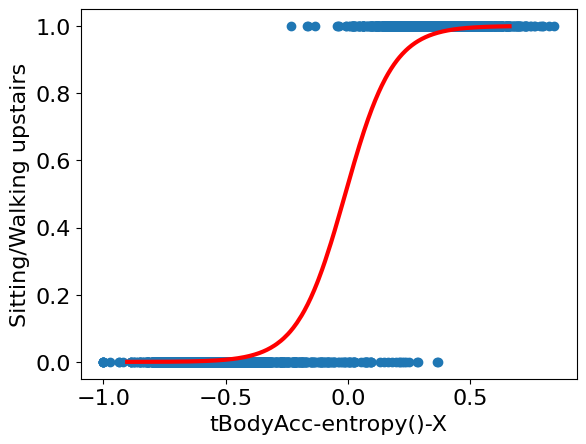

In [16]:
loss = expit(sorted(X_test.T[0].reshape(-1,1)) * logist.coef_ + logist.intercept_).ravel()
plt.plot(sorted(X_test.T[0].reshape(-1,1)), loss, color='red', linewidth=3)
plt.scatter(X_features.T[0].reshape(-1,1), y)
plt.xlabel(('tBodyAcc-entropy()-X'), fontsize=16)
plt.ylabel('Sitting/Walking upstairs', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

With labels 4 and 2 (sitting and walking upstairs) or 6 and 2 (walking upstairs and laying), performances are good considering only the variable tBodyAcc-entropy()-X

In [18]:
reg = LinearRegression()
reg.fit(X_features.T[0].reshape(-1,1), y)

LinearRegression()

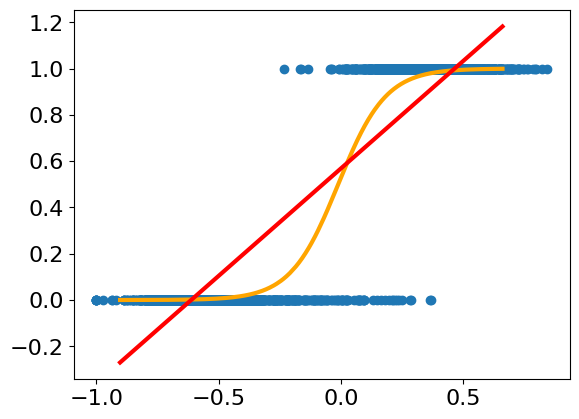

In [19]:
plt.scatter(X_features.T[0].reshape(-1,1), y)

loss = expit(sorted(X_test.T[0].reshape(-1,1)) * logist.coef_ +logist.intercept_).ravel()
plt.plot(sorted(X_test.T[0].reshape(-1,1)), loss, color='orange', linewidth=3)

plt.plot(sorted(X_test.T[0].reshape(-1,1)), reg.coef_ * sorted(X_test.T[0].reshape(-1,1)) + reg.intercept_, color='red', linewidth=3)
#plt.xlabel(selected_columns[0], fontsize=16)
#plt.ylabel('Occupancy', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

# Binary classification with all the variables

In [20]:
clf = LogisticRegression(max_iter=1000)
clf.fit(X_features, y)
y_pred_test = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(ytest, y_pred_test))
print('F1-score %s' % f1_score(ytest, y_pred_test, average=None))
print(classification_report(ytest, y_pred_test))

Accuracy 0.9948024948024948
F1-score [0.99488229 0.99472017]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       491
           1       0.99      1.00      0.99       471

    accuracy                           0.99       962
   macro avg       0.99      0.99      0.99       962
weighted avg       0.99      0.99      0.99       962



In [21]:
# define the model evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate the model and collect the scores
n_scores = cross_val_score(clf, X_features, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report the model performance
print('Mean Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Mean Accuracy: 1.000 (0.000)


In [22]:
print(clf.coef_)
print(clf.intercept_)

[[ 2.57144912 -0.04890326 -0.87756969 -1.37840307 -0.19190976 -1.21700033
   0.0276776  -1.19659618  0.24047832  0.5571485   0.41347699 -0.07012016
   0.07867642  1.88261799 -1.33778667 -0.31503857  1.19025696  1.11935923
  -0.7886864   2.91970984  1.90405946  1.79055535  0.66864518 -0.14157465
  -0.69141521  2.2262767   0.64782116  0.95918444]]
[11.08053934]


In [23]:
y_score2=clf.predict_proba(X_test)
y_score2

array([[9.96670517e-01, 3.32948317e-03],
       [9.99431171e-01, 5.68829228e-04],
       [9.99421912e-01, 5.78087863e-04],
       ...,
       [3.63130953e-03, 9.96368690e-01],
       [2.19411289e-02, 9.78058871e-01],
       [2.83371538e-02, 9.71662846e-01]])

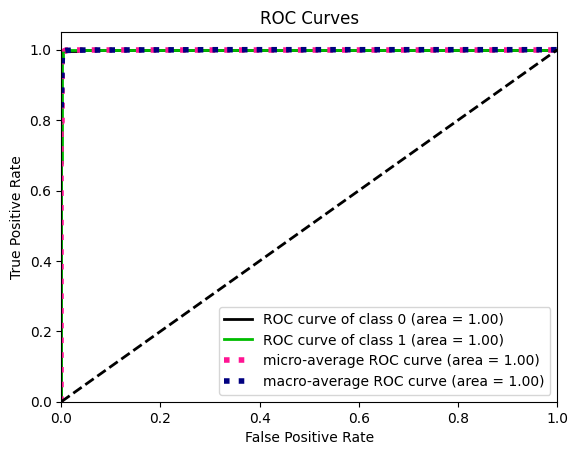

In [24]:
plot_roc(ytest, y_score2)
plt.show()

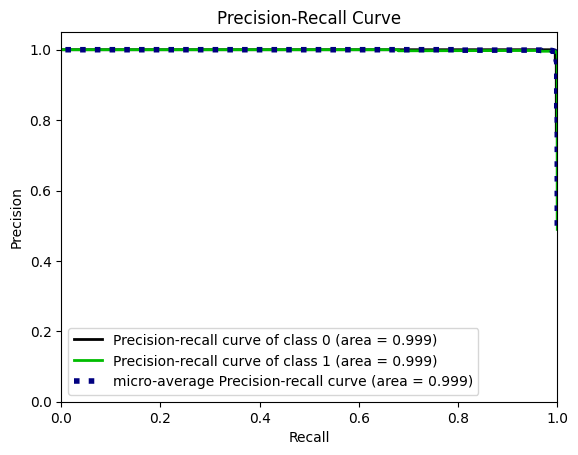

In [27]:
plot_precision_recall(ytest, y_score2)
plt.show()

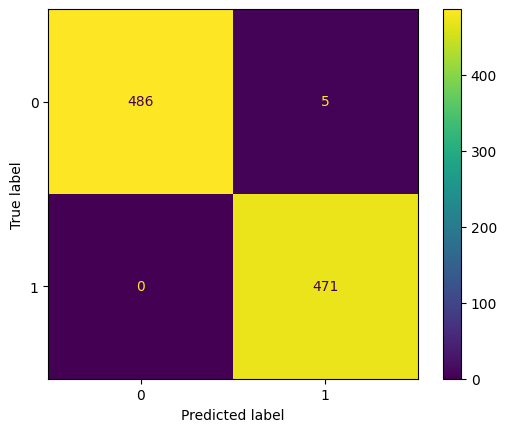

In [28]:
cm = confusion_matrix(ytest,y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

## Multinomial logistic

In [29]:
df2=pd.read_csv('df_RFE_6Class_LOF.csv')
df2=df2.drop(columns=['Unnamed: 0'])

In [30]:
X2 = df2.values
Xtrain2=X2[:,:28]
y2 = np.array(df2['label'])

df2.head()

,tBodyAcc-entropy()-X,"tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-Y,Z",tGravityAcc-mean()-Y,tGravityAcc-max()-X,tGravityAcc-max()-Z,tGravityAcc-min()-X,tGravityAcc-min()-Y,tGravityAcc-energy()-Y,"tGravityAcc-arCoeff()-Y,1",...,fBodyAcc-max()-Y,fBodyAccJerk-max()-Y,"fBodyAccJerk-bandsEnergy()-1,16",fBodyGyro-maxInds-X,fBodyGyro-meanFreq()-X,fBodyAccMag-mad(),fBodyAccMag-energy(),fBodyBodyGyroJerkMag-std(),"angle(Y,gravityMean)",label
0,-0.714892,-0.013429,0.579382,-0.141551,0.892060,0.122586,0.984520,-0.114893,-0.970583,-0.196359,...,-0.973770,-0.984923,-0.999987,-1.000000,-0.048167,-0.975777,-0.999472,-0.996399,0.180289,5
1,-0.592235,-0.124698,0.608900,-0.142010,0.892401,0.094566,0.986770,-0.114893,-0.970368,-0.329023,...,-0.963072,-0.985351,-0.999963,-1.000000,-0.216685,-0.985594,-0.999807,-0.995127,0.180637,5
2,-0.627446,-0.305693,0.507459,-0.143976,0.893817,0.093425,0.986821,-0.121336,-0.969400,-0.295036,...,-0.987275,-0.987874,-0.999978,-1.000000,0.216862,-0.983524,-0.999770,-0.995237,0.181935,5
3,-0.786553,-0.155804,0.599213,-0.148750,0.893817,0.091682,0.987434,-0.121834,-0.967051,-0.166693,...,-0.980848,-0.990373,-0.999988,-1.000000,-0.153343,-0.992324,-0.999873,-0.995465,0.185151,5
4,-0.751869,-0.209979,0.180424,-0.148210,0.893683,0.083347,0.987722,-0.121834,-0.967321,-0.198125,...,-0.993414,-0.992801,-0.999987,-0.933333,-0.363040,-0.993851,-0.999939,-0.995239,0.184823,5


In [31]:
test2 = pd.read_csv('df_RFE_test.csv')
test2=test2.drop(columns=['Unnamed: 0'])

In [32]:
Xtest2= test2.values
X_test2=Xtest2[:,:28]
ytest2 = np.array(test2['label'])

In [33]:
# Proof with standard scaler
scaler = StandardScaler()
scaler.fit(Xtrain2)
Xsca = scaler.transform(Xtrain2)
Xscate = scaler.transform(X_test2)

In [34]:
print(Counter(y2))

Counter({5: 1310, 6: 1298, 4: 1214, 1: 1182, 2: 1060, 3: 973})


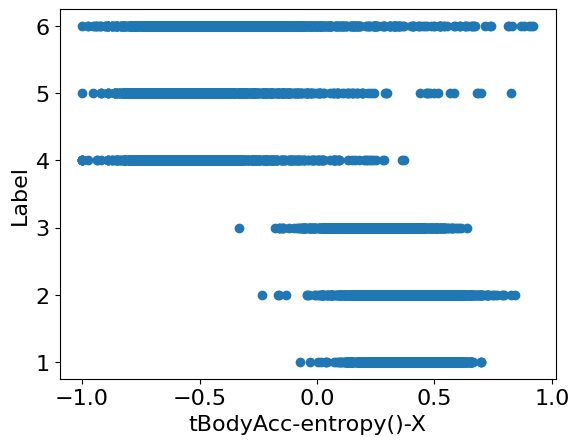

In [35]:
#example considering only one variable
plt.scatter(Xtrain2.T[0], y2)
plt.xlabel(('tBodyAcc-entropy()-X'), fontsize=16)
plt.ylabel('Label', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

In [36]:
model = LogisticRegression(multi_class='multinomial',solver='sag', max_iter=5000, penalty='l2')

In [37]:
# define the model evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate the model and collect the scores
n_scores = cross_val_score(model, Xtrain2, y2, scoring='accuracy', cv=cv, n_jobs=-1)

In [38]:
# report the model performance
print('Mean Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Mean Accuracy: 0.954 (0.008)


In this case, we can see that the multinomial logistic regression model with default penalty achieved a mean classification accuracy of about 95.5 percent on our synthetic classification dataset (with newton and l2, max iter standard).

In [40]:
# fit the model on the whole dataset (con solver=saga non converge nel nostro caso quindi ho usato newton-cg prima e poi aumentato
#le max iter a 5000)
model.fit(Xtrain2, y2)

LogisticRegression(max_iter=5000, multi_class='multinomial', solver='sag')

In [41]:
ypred_test2 = model.predict(X_test2)

In [42]:
# summarize the predicted class (es. first row)
print('Predicted Class: %d' % ypred_test2[0])

Predicted Class: 5


In [43]:
y_score3=model.predict_proba(X_test2)

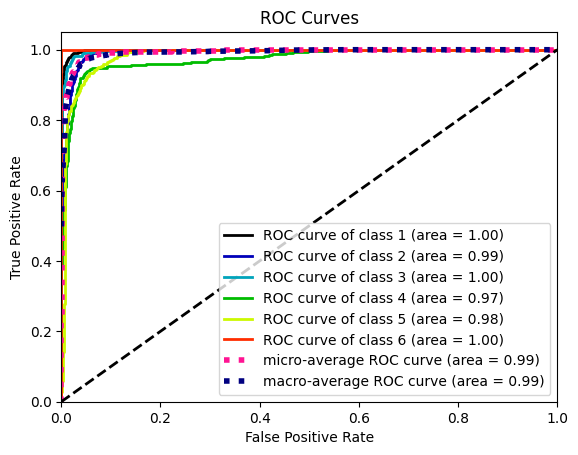

In [44]:
plot_roc(ytest2, y_score3)
plt.show()

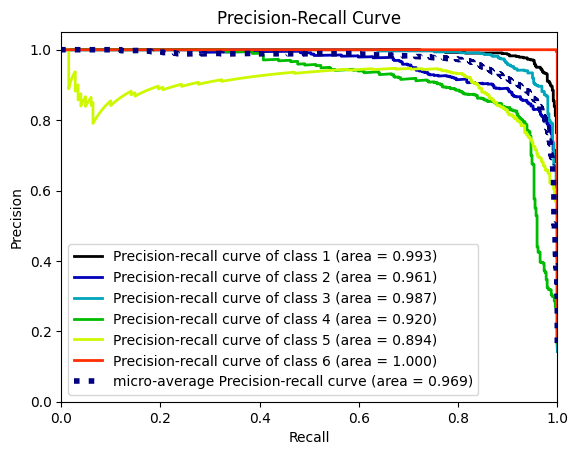

In [45]:
plot_precision_recall(ytest2, y_score3)
plt.show()

It is common to test penalty values on a log scale in order to quickly discover the scale of penalty that works well for a model. Once found, further tuning at that scale may be beneficial. We will explore the L2 penalty with weighting values in the range from 0.0001 to 1.0 on a log scale, in addition to no penalty or 0.0.

In [46]:
# get a list of models to evaluate
def get_models():
    models = dict()
    for p in [0.0, 0.0001, 0.001, 0.01, 0.1, 1.0]:
        # create name for model
        key = '%.4f' % p
        # turn off penalty in some cases
        if p == 0.0:
            # no penalty in this case
            models[key] = LogisticRegression(multi_class='multinomial', solver='sag', penalty='none', max_iter=5000)
        else:
            models[key] = LogisticRegression(multi_class='multinomial', solver='sag', penalty='l2', C=p, max_iter=5000)
    return models

In [47]:
# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
    # define the evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    # evaluate the model
    scores3 = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores3

In [48]:
#get the models to evaluate
listmodels=get_models()

In [53]:
# evaluate the models and store results
results, names = list(), list()
for name, model in listmodels.items():
    # evaluate the model and collect the scores
    scores3 = evaluate_model(model, Xtrain2, y2)
    # store the results
    results.append(scores3)
    names.append(name)
    # summarize progress along the way
    print('>%s %.3f (%.3f)' % (name, mean(scores3), std(scores3)))

>0.0000 0.962 (0.008)
>0.0001 0.522 (0.005)
>0.0010 0.881 (0.014)
>0.0100 0.921 (0.012)
>0.1000 0.941 (0.011)
>1.0000 0.954 (0.008)


In this case, we can see that a C value of 1.0 has the score of about 95.5 percent, which is the same as using no penalty that achieves the same score more or less (96.1 percent). With newton, lbfgs, sag and max_iter=1000  96.3% accuracy is achieved with zero penalty, with penalty=1 instead 95.4% accuracy is achieved.

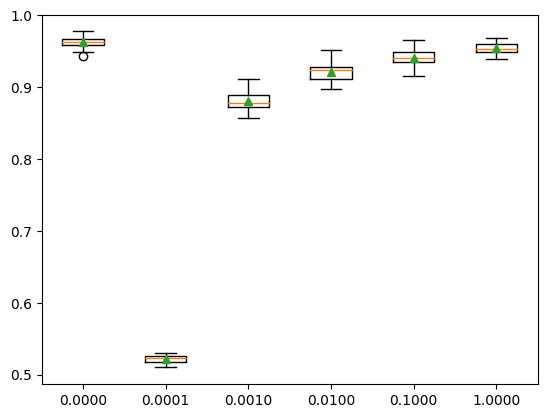

In [54]:
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

In [56]:
print('Accuracy %s' % accuracy_score(ytest2, ypred_test2))
print('F1-score %s' % f1_score(ytest2, ypred_test2, average=None))
print(classification_report(ytest2, ypred_test2))

Accuracy 0.9090600610790635
F1-score [0.9351145  0.87637969 0.9253012  0.84848485 0.8640148  0.99813433]
              precision    recall  f1-score   support

           1       0.89      0.99      0.94       496
           2       0.91      0.84      0.88       471
           3       0.94      0.91      0.93       420
           4       0.87      0.83      0.85       491
           5       0.85      0.88      0.86       532
           6       1.00      1.00      1.00       537

    accuracy                           0.91      2947
   macro avg       0.91      0.91      0.91      2947
weighted avg       0.91      0.91      0.91      2947



With penalty=none we have better results than penalty l2 and solver sag. So they are all good but sag and none penalty is the best

In [57]:
model.get_params(deep=True)

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 5000,
 'multi_class': 'multinomial',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'sag',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [59]:
pipe = Pipeline([('classifier' , LogisticRegression(max_iter=5000, multi_class='multinomial'))])
param_grid = [
    {'classifier__penalty' : ['l1', 'l2', 'none'],
    'classifier__C' : [0.0, 0.0001, 0.001, 0.01, 0.1, 1.0],
    'classifier__solver' : ['lbfgs','sag','newton-cg']}]

In [60]:
clfgrid = GridSearchCV(pipe, param_grid = param_grid, cv = 10, verbose=True, n_jobs=-1)

In [ ]:
clfgrid.fit(Xtrain2,y2)

In [ ]:
print(clfgrid.best_params_)

{'classifier__C': 1.0, 'classifier__penalty': 'l2', 'classifier__solver': 'lbfgs'}


In [62]:
model = LogisticRegression(multi_class='multinomial',solver='saga', max_iter=5000, penalty='l2',C=1.0)

In [63]:
model2 = LogisticRegression(multi_class='multinomial',solver='saga', max_iter=10000, penalty='none')

In [ ]:
# define the model evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate the model and collect the scores
n_scores = cross_val_score(model2, Xtrain2, y2, scoring='accuracy', cv=cv, n_jobs=-1)

In [ ]:
# report the model performance
print('Mean Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Mean Accuracy: 0.963 (0.008)


In [ ]:
#fit on whole dataset
model2.fit(Xtrain2, y2)

LogisticRegression(max_iter=5000, multi_class='multinomial', penalty='none',
                   solver='saga')

In [65]:
#fit on standard con penalty (with standard scaler)
model.fit(Xsca,y2)
ypred_tests = model.predict(Xscate)
print('Accuracy %s' % accuracy_score(ytest2, ypred_tests))
print('F1-score %s' % f1_score(ytest2, ypred_tests, average=None))
print(classification_report(ytest2, ypred_tests))


Accuracy 0.9124533423820834
F1-score [0.94038462 0.87272727 0.93902439 0.85804416 0.87603306 0.98583569]
              precision    recall  f1-score   support

           1       0.90      0.99      0.94       496
           2       0.88      0.87      0.87       471
           3       0.96      0.92      0.94       420
           4       0.89      0.83      0.86       491
           5       0.86      0.90      0.88       532
           6       1.00      0.97      0.99       537

    accuracy                           0.91      2947
   macro avg       0.91      0.91      0.91      2947
weighted avg       0.91      0.91      0.91      2947



In [66]:
#fit on standard SENZA penalty
model2.fit(Xsca,y2)
ypred_tests = model2.predict(Xscate)
print('Accuracy %s' % accuracy_score(ytest2, ypred_tests))
print('F1-score %s' % f1_score(ytest2, ypred_tests, average=None))
print(classification_report(ytest2, ypred_tests))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


Accuracy 0.9175432643366135
F1-score [0.95339806 0.88167539 0.95030303 0.86589229 0.88542621 0.96940727]
              precision    recall  f1-score   support

           1       0.92      0.99      0.95       496
           2       0.87      0.89      0.88       471
           3       0.97      0.93      0.95       420
           4       0.90      0.84      0.87       491
           5       0.86      0.91      0.89       532
           6       1.00      0.94      0.97       537

    accuracy                           0.92      2947
   macro avg       0.92      0.92      0.92      2947
weighted avg       0.92      0.92      0.92      2947

